<a href="https://colab.research.google.com/github/saif-islam-rayhan/DataScience-and-ML/blob/main/Breast__Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [5]:
y_pred = model.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Corelation matrix

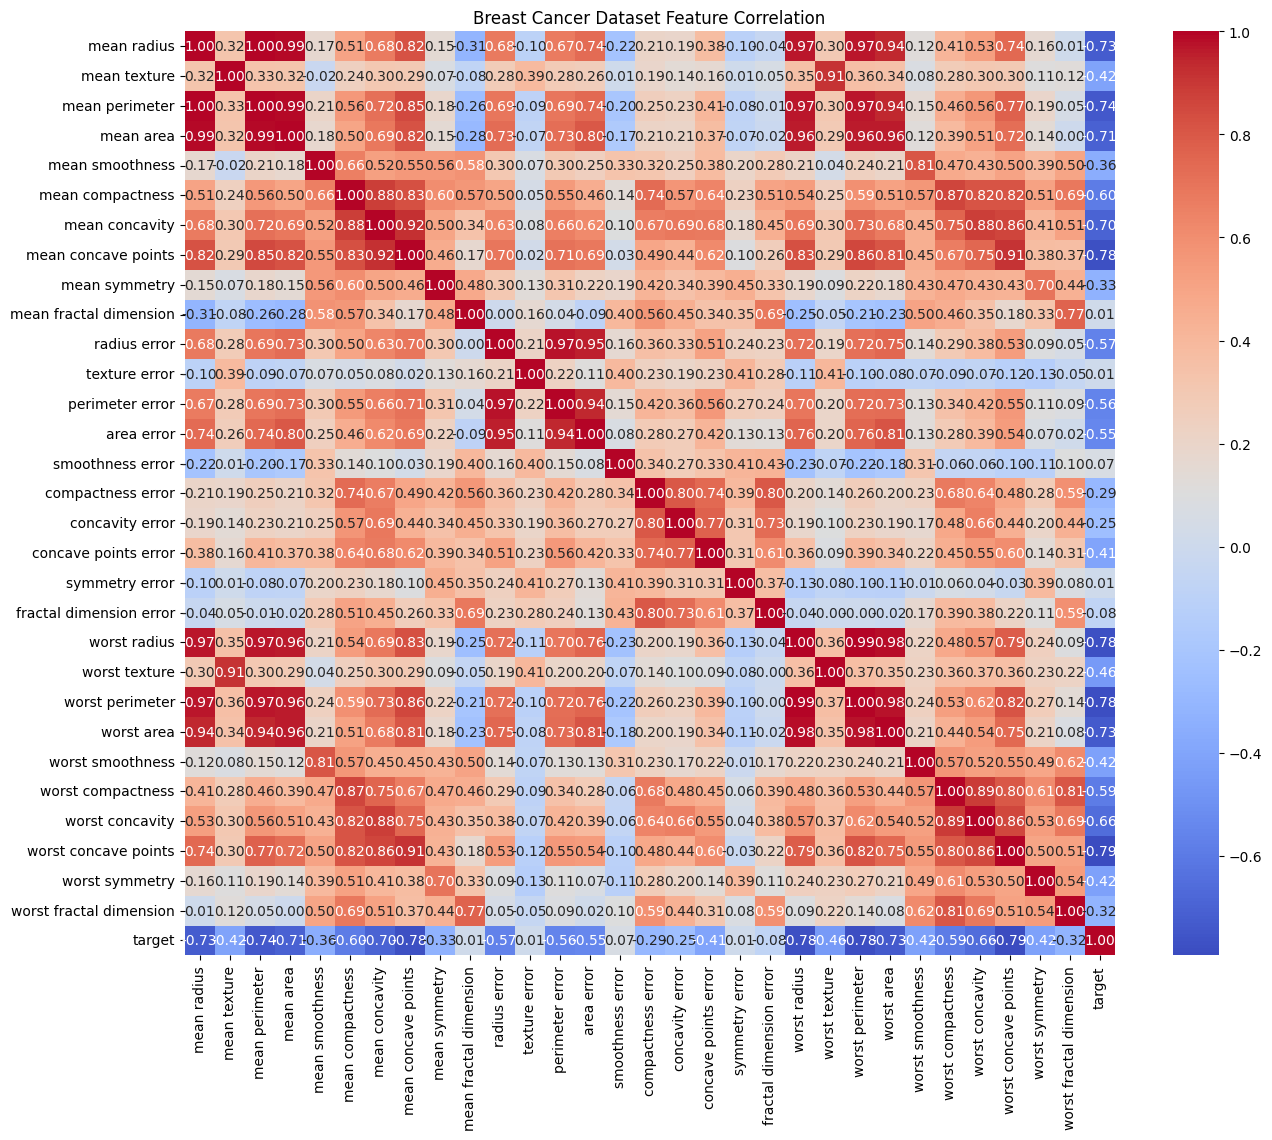

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


corr_matrix = df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Breast Cancer Dataset Feature Correlation")
plt.show()


Corelation matrix find  with Target columns

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

corr_with_target = df.corr()['target'].sort_values(key=abs, ascending=False)
print("Correlation with target:\n", corr_with_target)


Correlation with target:
 target                     1.000000
worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
sm

# Find Important feature

In [9]:

corr_with_target = df.corr()['target'].sort_values(key=abs, ascending=False)


important_features = corr_with_target[abs(corr_with_target) > 0.5].index.tolist()

important_features.remove('target')

print("Important features:", important_features)


Important features: ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity', 'mean compactness', 'worst compactness', 'radius error', 'perimeter error', 'area error']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[important_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

